# ECSE 415: Assignment 3
## Segmentation & Stereo Vision
### Author: Antonios Valkanas

In [1]:
import sys
import re
import cv2, math
import numpy as np
from struct import *
import matplotlib.pyplot as plt

### Question 2.1 (a)
* Estimate depth using the stereo image pair. Show the results of varying the following parameters: blockSize 2 (5; 10; 15), numDisparities 2 (16; 32; 48). You will have a total of 9 depth-maps, each corresponding to one combination of blocksize and numDisparities.

In [2]:
def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

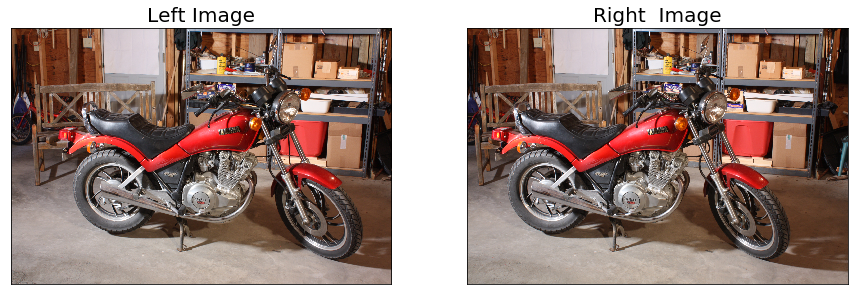

In [3]:
# Load images & color correct them.
imgl = cv2.imread("./im0.png")
imgr = cv2.imread("./im1.png")
imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgl), plt.title("Left Image", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgr), plt.title("Right  Image", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()

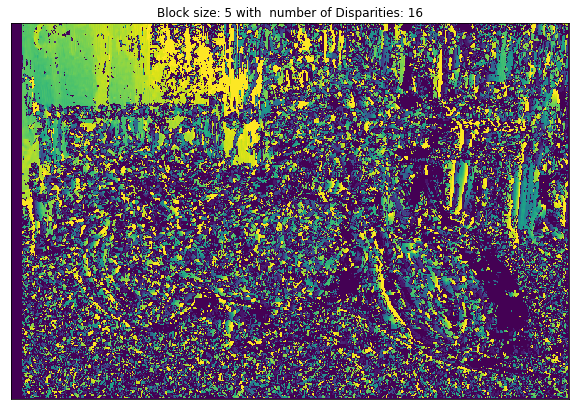

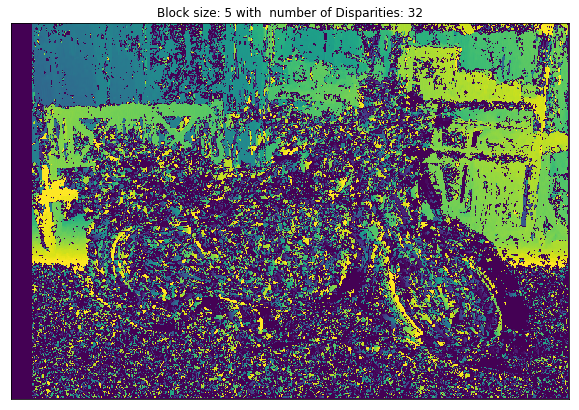

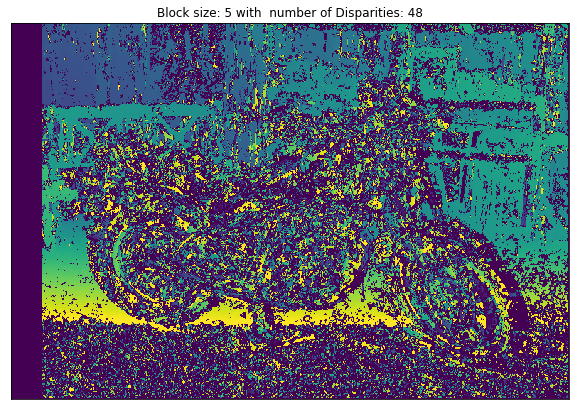

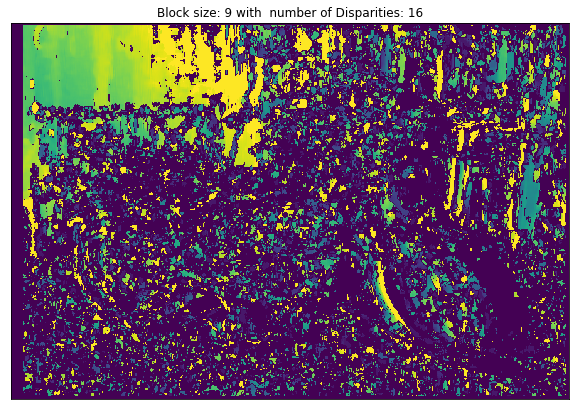

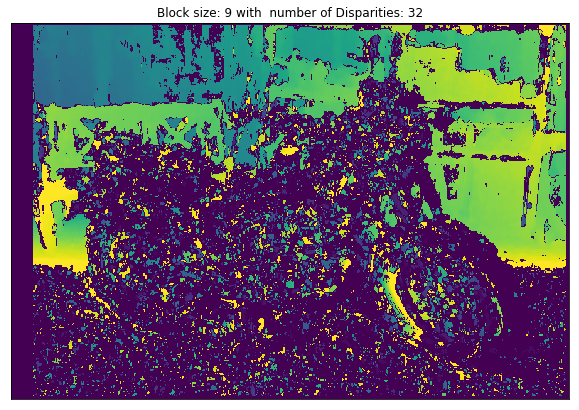

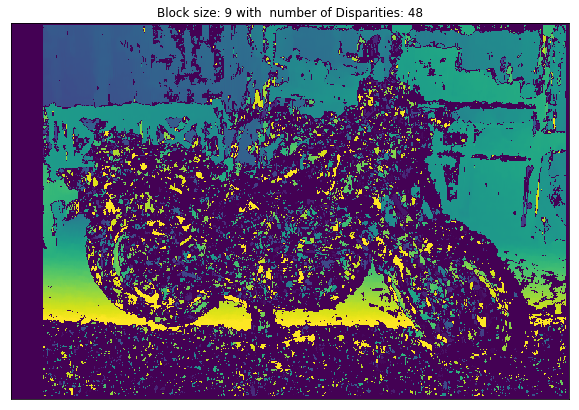

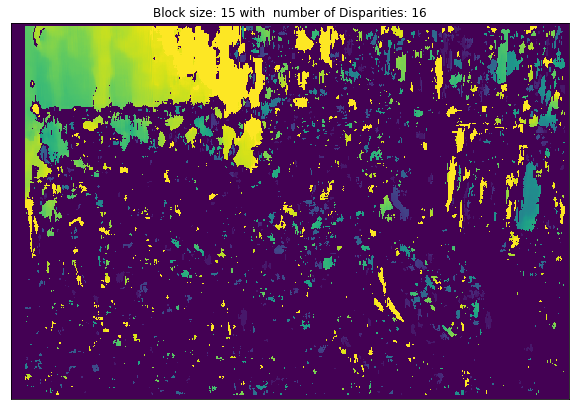

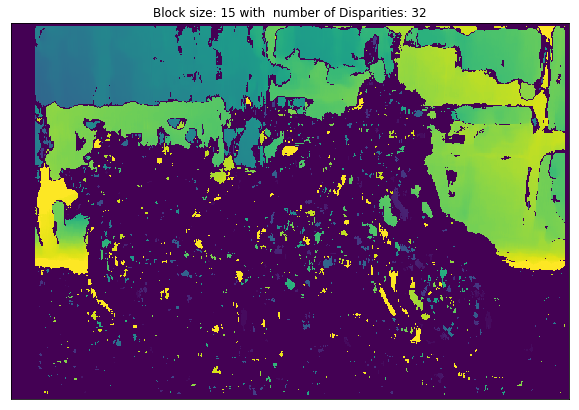

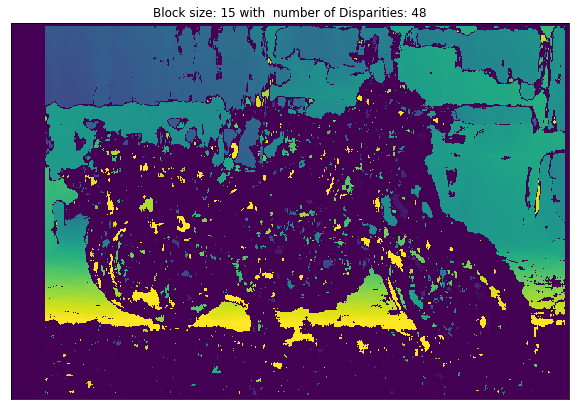

In [4]:
def get_depth(left, right, block_size, num_disparities):   
    
    # Convert to grayscale
    left = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)
    
    # Resize Images for fast processing
    size = 0.3
    left = cv2.resize(left, None, fx=size, fy=size)
    right = cv2.resize(right, None, fx=size, fy=size)

    disparities = []
    parameters = []
    
    # Compute Depth Map for each parameter combination
    for i in block_size:
        for j in num_disparities:
            stereo = cv2.StereoBM_create(numDisparities=j,blockSize=i) 
            disparity = stereo.compute(left, right)
            disparities.append(disparity)
            parameters.append((i, j))
            plt.figure(figsize=(10,10))
            plt.imshow(disparity)
            plt.title( "Block size: " + str(i) + " with  number of Disparities: " + str(j)), plt.xticks([]), plt.yticks([])
            plt.show()

    return disparities, parameters

blockSize = [5, 9, 15]
numDisparities = [16, 32, 48]

disparities, parameters = get_depth(imgl, imgr, blockSize, numDisparities)

### Question 2.1 (b)
* For each depth-map, compute the pixel-wise squared difference error with respect to the ground-truth.

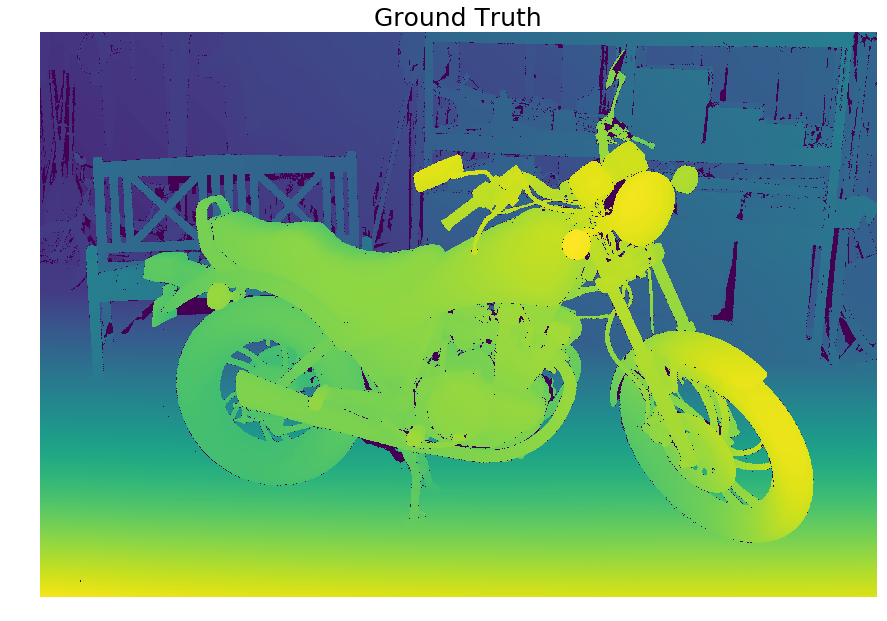

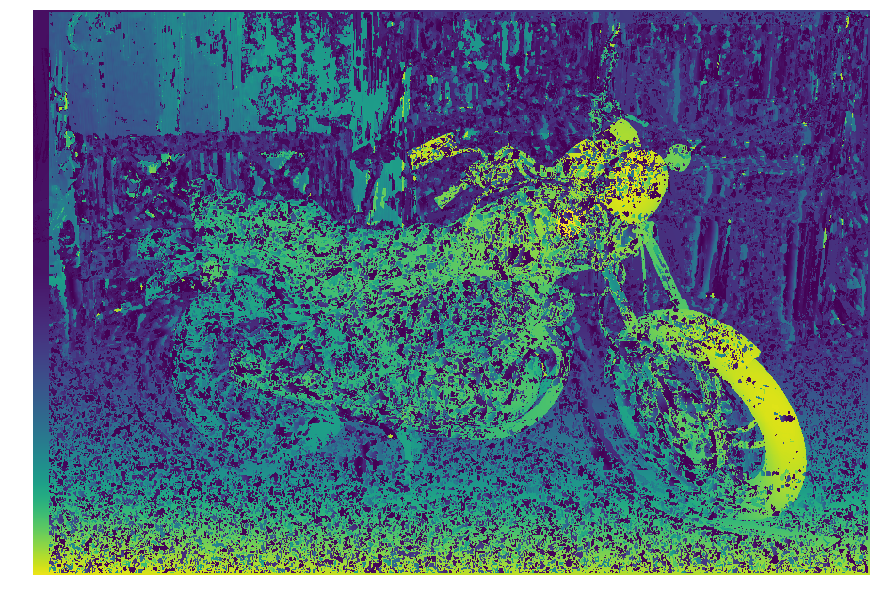

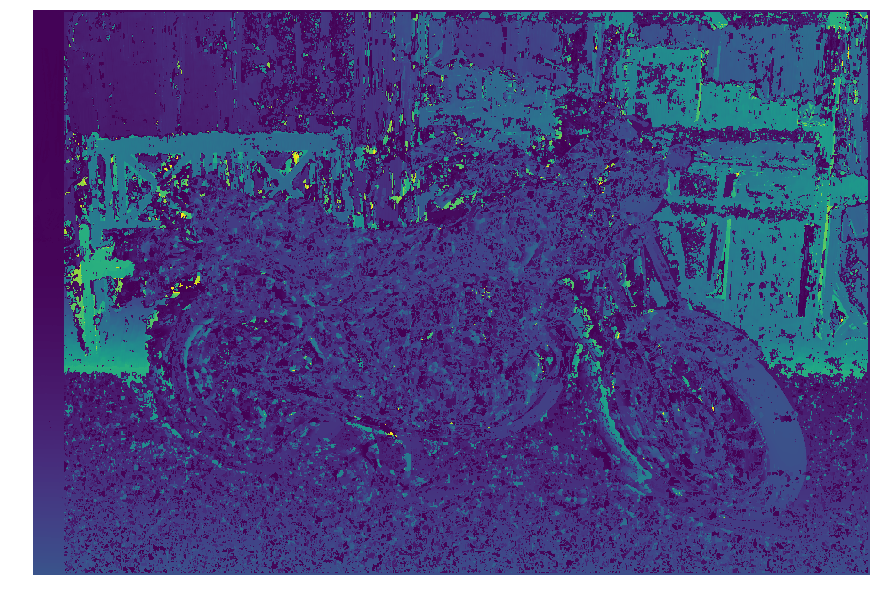

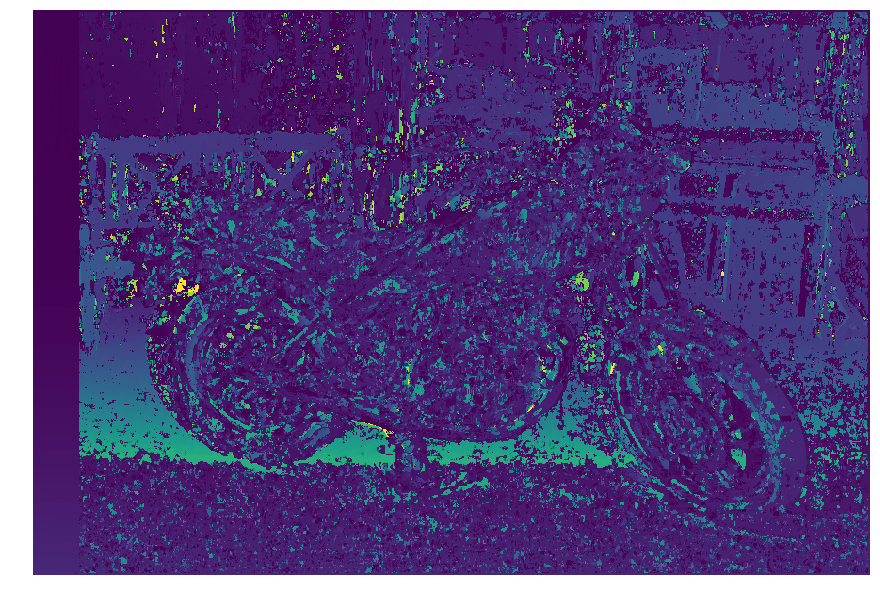

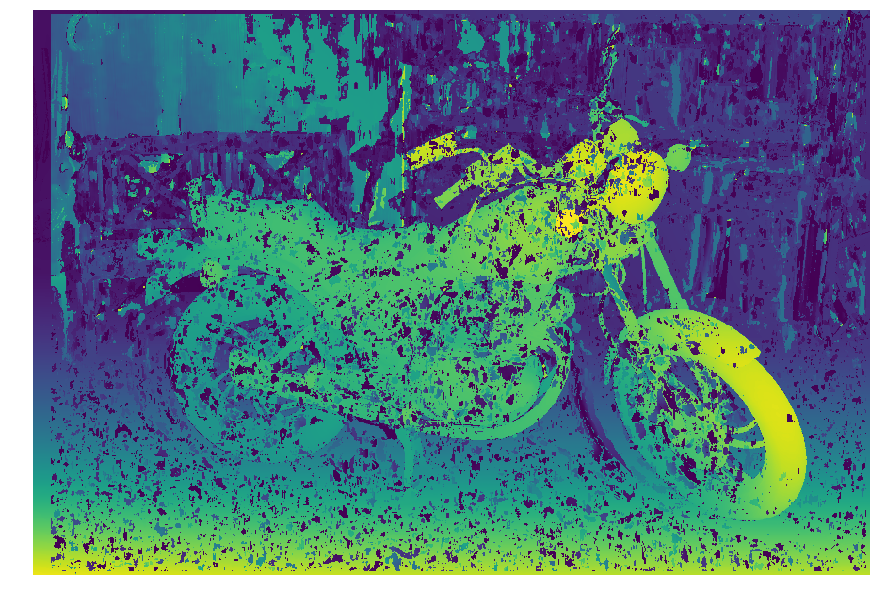

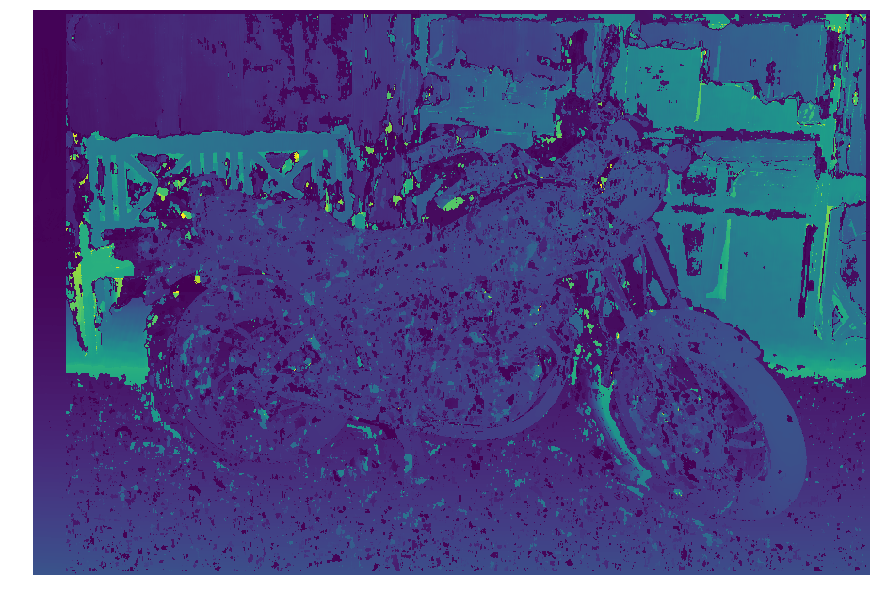

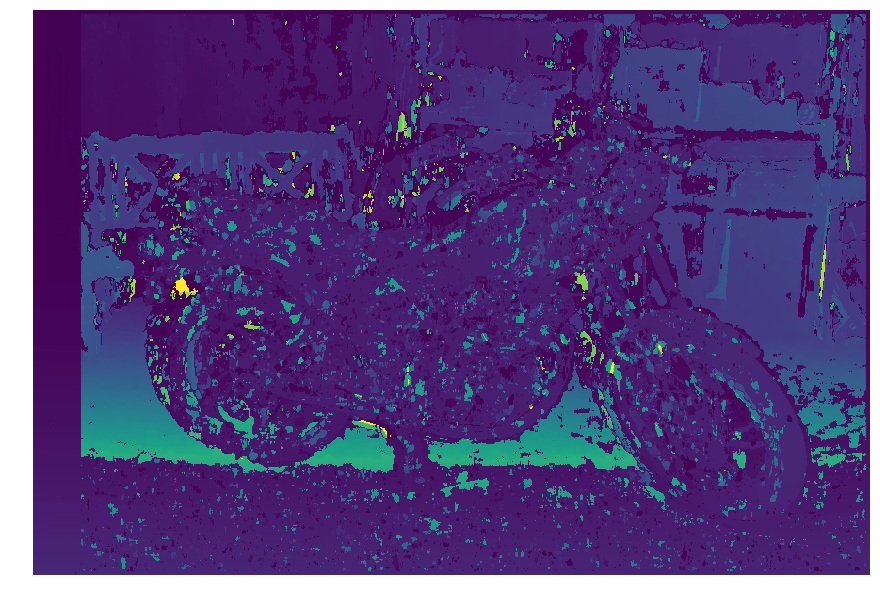

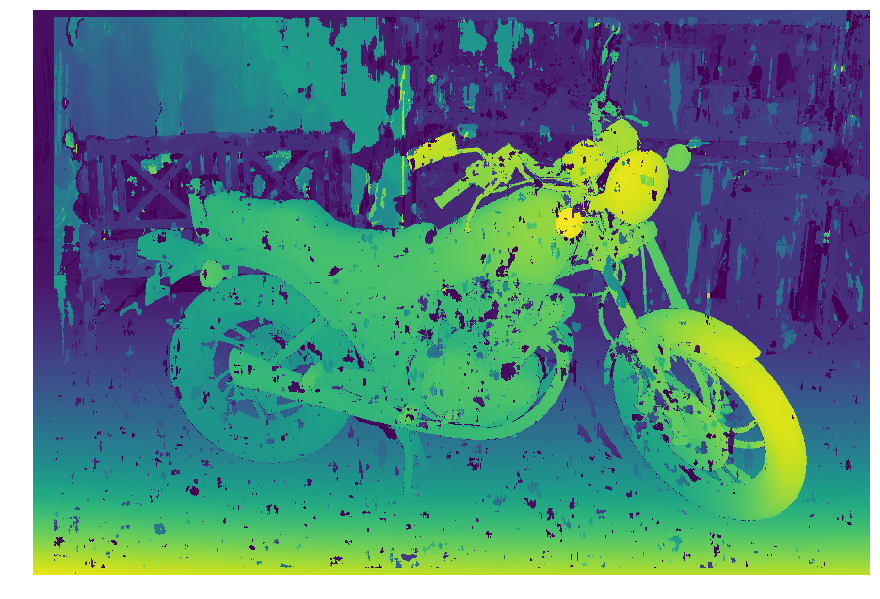

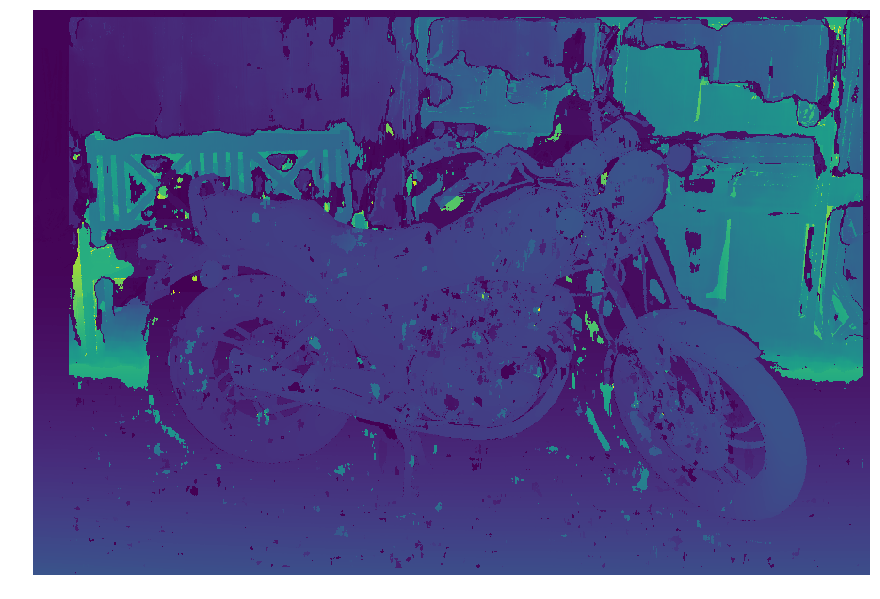

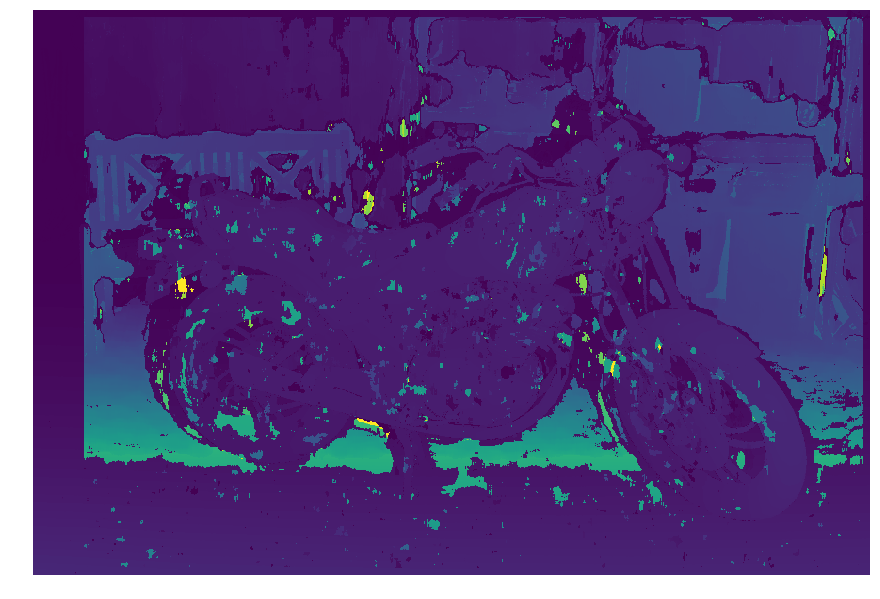

In [5]:
ground_truth = read_pfm("disp0.pfm")
ground_truth[ground_truth==np.inf] = 0

plt.figure(figsize=(15,15))
plt.imshow(ground_truth)
plt.title("Ground Truth", fontsize = 25), plt.axis("off")
plt.show()

ground_truth = cv2.resize(ground_truth, None, fx=0.3, fy=0.3)

error_maps = []

for error_map in disparities:
    error = (error_map - ground_truth)**2
    error_maps.append(error)
    
plt.figure(figsize=(15,15))
plt.imshow(error_maps[0]), plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(error_maps[1]), plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(error_maps[2]), plt.axis("off")
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(error_maps[3]), plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(error_maps[4]), plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(error_maps[5]), plt.axis("off")
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(error_maps[6]), plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(error_maps[7]), plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(error_maps[8]), plt.axis("off")
plt.show()

### Question 2.1 (c)
* Comment on the error-maps for each combination of parameters. Specifically, mention the effects of varying the parameters on the error in the region of high/low texture, edge, large/small depths.

* The more disparities there are, the higher the accuracy in low texture areas. However, this comes at the cost of decreasing accuracy in high texture ares. Decreasing the block size increases high texture accuracy, and increasing it has the inverse effect. 
<br>
* Decreasing the number of disparities reduces edge definition while increasing block sizes increases it.
<br>
* Increasing the number of disparities improves depth detection, while increasing the block size smoothens the depth estimation.